In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

# Pre-processing

In [2]:
df = pd.read_csv('OnlineRetail.csv')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Modeling

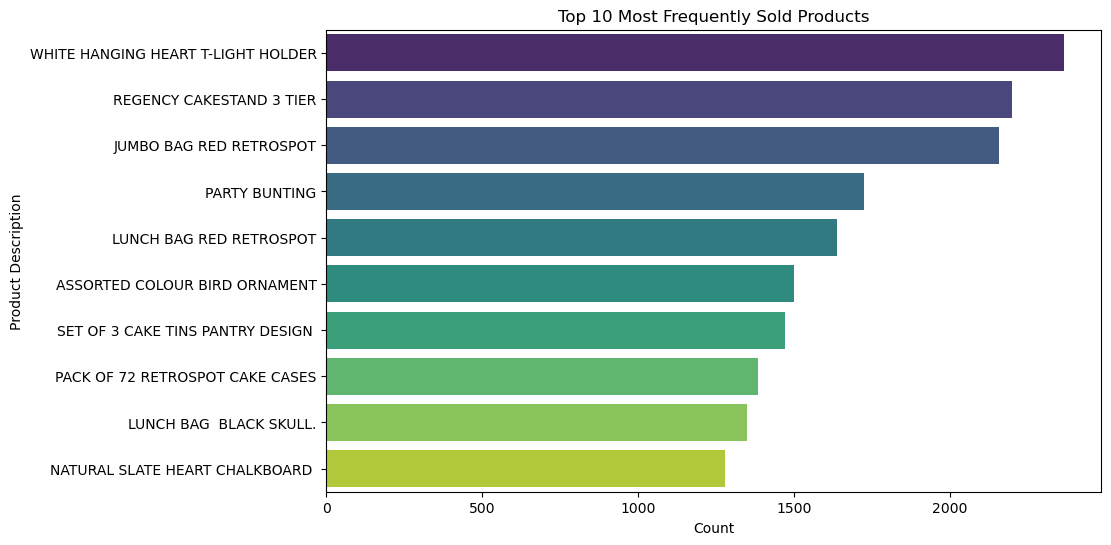

In [11]:
product_counts = df['Description'].value_counts().head(10)

df_product_counts = product_counts.reset_index()
df_product_counts.columns = ['Product Description', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Product Description', data=df_product_counts, palette='viridis')
plt.title('Top 10 Most Frequently Sold Products')
plt.xlabel('Count')
plt.ylabel('Product Description')
plt.show()


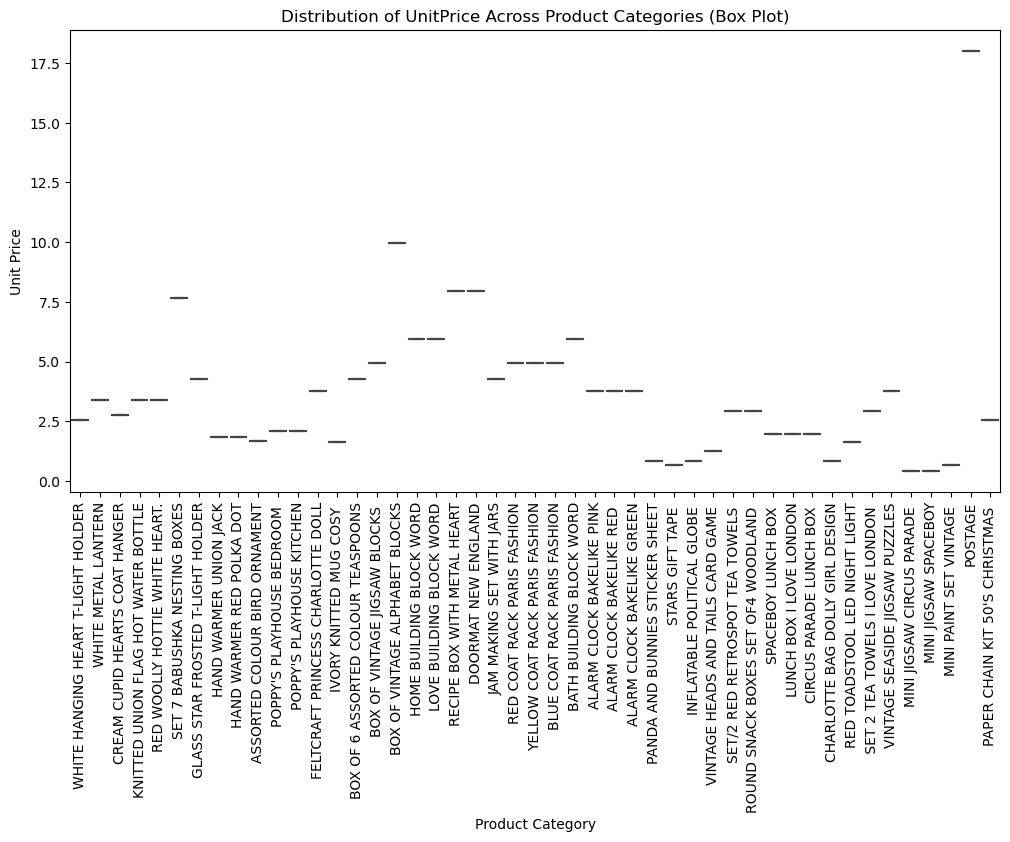

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Description', y='UnitPrice', data=df.head(50))  # You can adjust the number of rows for better visualization
plt.xticks(rotation=90)
plt.title('Distribution of UnitPrice Across Product Categories (Box Plot)')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.show()


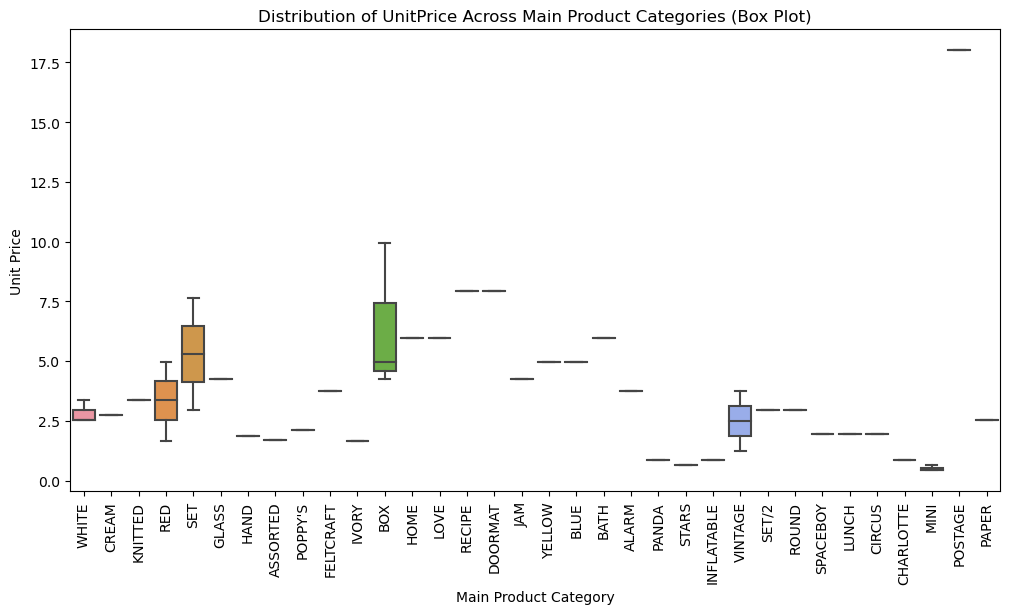

In [13]:
df['MainCategory'] = df['Description'].str.split().str[0]

plt.figure(figsize=(12, 6))
sns.boxplot(x='MainCategory', y='UnitPrice', data=df.head(50))  # You can adjust the number of rows for better visualization
plt.xticks(rotation=90)
plt.title('Distribution of UnitPrice Across Main Product Categories (Box Plot)')
plt.xlabel('Main Product Category')
plt.ylabel('Unit Price')
plt.show()


# Pre-Processing

In [14]:
df.dropna(inplace=True)

In [15]:
df.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

In [16]:
X = df[['Quantity', 'UnitPrice']]

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering

In [18]:
numerical_features = df[['Quantity', 'UnitPrice']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_features)

df['Cluster'] = kmeans.labels_

cluster_centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster centers:")
print(cluster_centers_original_scale)


Cluster centers:
[[ 1.24429093e+01  3.36469853e+00]
 [-1.00000000e+00  3.89700000e+04]
 [-7.76050000e+04  1.56000000e+00]]


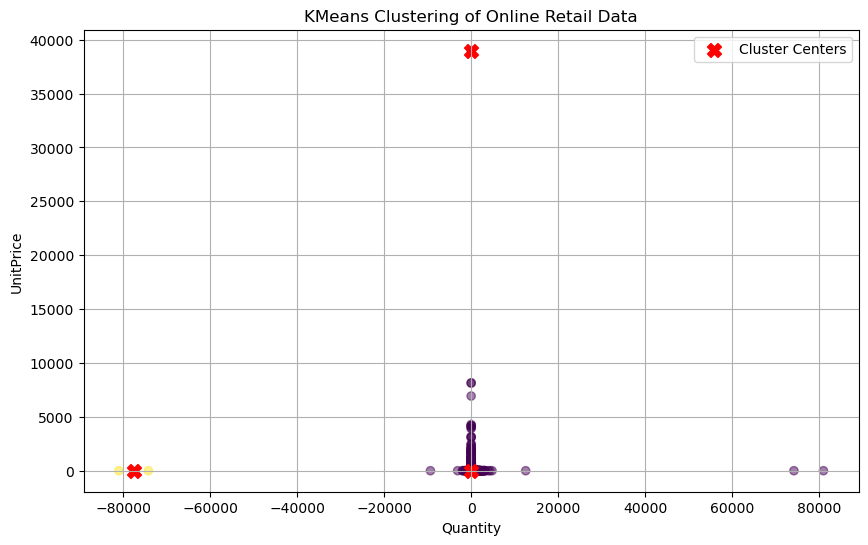

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of the data points with cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers_original_scale[:, 0], cluster_centers_original_scale[:, 1], marker='X', s=100, color='red', label='Cluster Centers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('KMeans Clustering of Online Retail Data')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
grouped_data = df.groupby('Description').size().reset_index(name='Count')

X = grouped_data[['Count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

grouped_data['Cluster'] = kmeans.labels_

print(grouped_data.head())


                      Description  Count  Cluster
0   4 PURPLE FLOCK DINNER CANDLES     39        0
1   50'S CHRISTMAS GIFT BAG LARGE    110        0
2               DOLLY GIRL BEAKER    140        0
3     I LOVE LONDON MINI BACKPACK     70        0
4     I LOVE LONDON MINI RUCKSACK      1        0


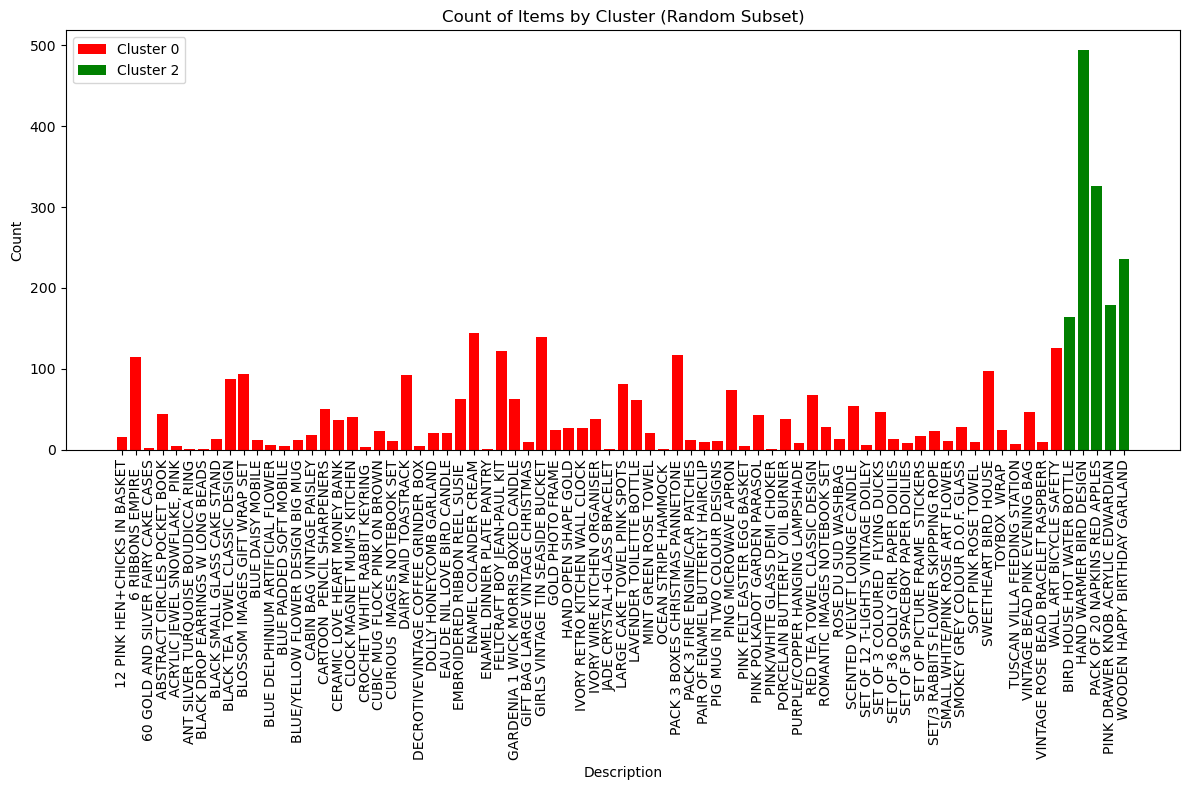

In [21]:
import matplotlib.pyplot as plt
import random

random.seed(42)
subset_descriptions = random.sample(list(grouped_data['Description']), 75)

plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b']
for cluster, color in zip(grouped_data['Cluster'].unique(), colors):
    if cluster in [0, 2]:
        cluster_data = grouped_data[grouped_data['Cluster'] == cluster]
        subset_cluster_data = cluster_data[cluster_data['Description'].isin(subset_descriptions)]
        plt.bar(subset_cluster_data['Description'], subset_cluster_data['Count'], color=color, label=f'Cluster {cluster}')

plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Count of Items by Cluster (Random Subset)')
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Linear Regression

Intercept: 3.4857345101750887
Coefficient(s): [-0.00028149]


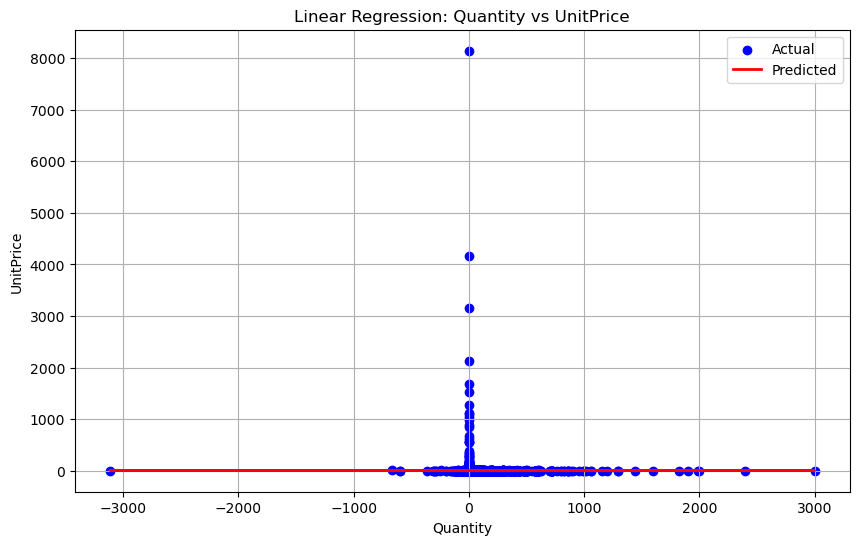

In [22]:
X = df[['Quantity']]  # Predictor variable
y = df['UnitPrice']    # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
print('Coefficient(s):', model.coef_)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Linear Regression: Quantity vs UnitPrice')
plt.legend()
plt.grid(True)
plt.show()


# Extra

In [23]:

df_Customer = df.loc[:, ['CustomerID', 'Country']]
df_Customer = df_Customer.drop_duplicates(subset='CustomerID')

df_country_count = df_Customer.groupby(by = 'Country').size().reset_index(name='Count')
df_country_count = df_country_count.sort_values(by='Count', ascending=False).reset_index(drop=True)

df_country_count_top10 = df_country_count.head(10)
df_country_count

,Country,Count
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,29
4,Belgium,24
5,Switzerland,20
6,Portugal,19
7,Italy,15
8,Finland,12
9,Norway,10


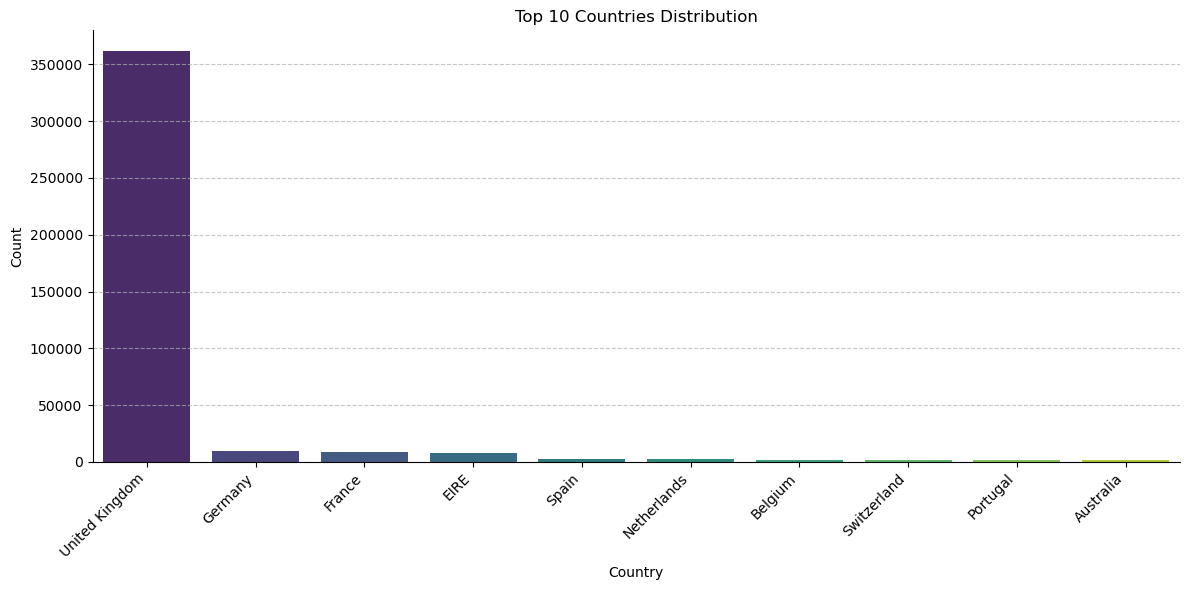

In [24]:
top_countries = df['Country'].value_counts().nlargest(10).index
subset_data = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=subset_data, palette='viridis', order=top_countries)
plt.title('Top 10 Countries Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
sns.despine()  

plt.tight_layout()
plt.show()
